# Домашка 1

### Задание 1
Сравните метрики hit_rate@k, precision@k.  
Какую метрику использовать предпочтительно и почему?  
Приведите пример 2-3 задач (опишите, что является клиентом, что товаром), в которой более уместно использовать метрику hit_rate?


__Ответ:__
hit_rate@k имеет два возможных значения, "попали" мы хоть как-то с нашими рекомендациями, есть ли в них хоть один релевантный товар. precision@k в свою очередь учитывает процент релевантных рекомендаций. Например, для рекомендаций из 5 товаров, если мы угадали только с 1 товаром, hit_rate@k = 1, precision@k = 20%.  Если угадали с 2 товарами, то hit_rate@k = 1, precision@k = 40%

Очевидно, что precision@k в большинстве использовать преподчительно.

Я думаю, hit_rate@k использовать предпочтительно, там где покупатель, может купить только 1 товар из 5 рекомендованных. Например, при рекомендации объектов недвижимости, или автомобилей, или яхт. precision@5, например, в этих случаях не будет выше 20%. Соответственно его легко заменить hit_rate@5 без потери качества. Заодно это немного снизит вычислительную нагрузку, и возможно, необходимую сложность модели для качественных предсказаний.

### Задание 2
В метрике NDCG@k мы используем логарифм в знаменателе. Как Вы думаете, почему именно логарифм? Какую функцию можно использовать вместо логарифма? Привидите пример метрик/подходов к предобработке данных/функций ошибок в ML, где также в  логарифм.



__Ответ:__

Как было рассказано в одной статье, использование логарифма в знаменателе очень хорошо решает задачу различного веса рекомендованных товаров на разных позициях. Товар, в списке рекомендаций на 1 месте имеет значительно больший вес, чем товар на 11 позиции. В той же поисковой выдаче, между ними может быть целая пропасть. Логарифм в знаметеле хорошо решает эту задачу существенно понижая вес каждого товара, чем выше номер его позиции в списке рекомендаций.

Вместо 1/log можно использовать $e^{-x}$, или $\frac{1}{x}$. Графики функций похожи. Единственное, что две последних быстрее достигают асимптоты (выходят "на прямую"), но для количества рекомендаций в несколько десятков, этого может быть достаточно. 

В качестве примера, где еще используется логарифм, можно привести логарифмическую функцию потерь. переход к логарифмичекой функции используется, чтобы уйти от недиференцируемой функции к дифферинцируемой 

<ipython-input-239-9f723d5b414b>:7: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(x, 1/np.log2(x), label='1/log2')


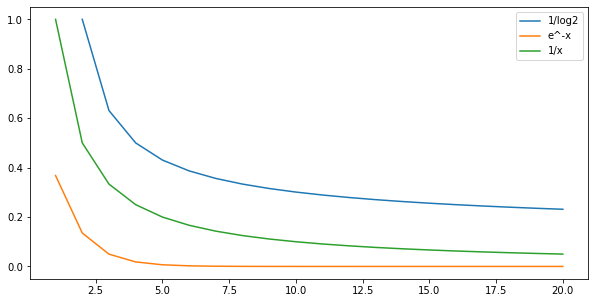

In [239]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(10, 5), )

x = np.arange(20)+1
ax.plot(x, 1/np.log2(x), label='1/log2')
ax.plot(x, np.exp(-x), label='e^-x')
ax.plot(x, 1/x, label='1/x')

ax.legend(loc='upper right')
plt.show();

### Задание 3
Какие еще метрики (Вы можете вспомнить уже пройденные Вами или посмотреть в интернете) могут использоваться для рекомендательных систем (приведите примеры метрики **и чем являются интеракции**, чтобы она могла быть использована).

__Ответ:__

Для начала сравним map@K и NDCG@K. Важное их отличие, что интеракции для первой могут быть бинарными (нравится, не нравится), для второй могут быть не бинарными (оценка за фильм от 0 до 10 баллов, например).

Метрика ERR допускает не бинарные виды интеракций

Метрика MRR@K допускает только бинарные виды интеракций 

### Задание 4

boughted = [1, 3, 5, 7, 9, 11]  
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]  
Посчитайте на этих данных pr@8, rec@8, AP@8, NDCG@8, MRR@8,  
Сначала поссчитайет "руками", а затем подтвердите рассчеты с помощью функций (некоторые были на семинаре, некоторые нужно будут написать самостоятельно)

IDCG должен считаться для всех 8 позиций рекомендаций

**Пример выполнения 4го задания**

MSE на  
$y = [0, 2]$  
$y_{pred} = [1, 2]$

MSE = $0.5*((0 - 1)^2 + (2-2)^2) = 0.5$ 

In [4]:
import numpy as np
((np.array([0, 2]) - np.array([1, 2]))**2).mean()

0.5

__Ответ:__

__Примечание:__ Функцию ap_k изменил. В методичке, по-моему мнению она содержит ошибки. Писал об этом в общий чат обучения. Дублирую здесь, текст:


1.Если мы считаем ap@5 или ap@8 в данной реализации у нас одинаковая длина массива flags. Т.е. мы всегда берем всю длину входного массива recommended_list. И в знаменатель идет одинаковое значение len(flags). А должно быть разное

2.Почему мы когда перебираем флаги (совпадения), мы начинаем со второго? И для первого не считаем precision@1? Получается, что если мы молодцы и рекомендация на первой позиции релевантная, это никак не влияет на итоговую метрику. Попадать начинают только со второй. Ну и в конце залетает одна лишняя.

На единичку надо увеличивать в строке:
p_k = precision_at_k(recommended_list, bought_list, k=i+1). А изначальный перебор флагов должен быть от range(0,k)

In [240]:
import numpy as np

def precision_at_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    bought_list = bought_list  # Тут нет [:k] !!
    recommended_list = recommended_list[:k]
    
    flags = np.isin(bought_list, recommended_list)
    precision = flags.sum() / len(recommended_list)
    
    
    return precision


def recall_at_k(recommended_list, bought_list, k=5):
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)[:k]
    
    flags = np.isin(bought_list, recommended_list)
    
    recall = flags.sum() / len(bought_list)
    
    return recall


def ap_k(recommended_list, bought_list, k=5):
    
    bought_list = np.array(bought_list)
    recommended_list = np.array(recommended_list)
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0
    
    sum_ = 0
    for i in range(0, k): 
        if flags[i] == True:
            p_k = precision_at_k(recommended_list, bought_list, k=i+1)
            sum_ += p_k
            
    result = sum_ / k
    
    return result

In [241]:
def dcg_at_k(recommended_list, bought_list, k=5):
    recommended_list = np.array(recommended_list)[:k]
    
    if len(recommended_list) == 0:
        return 0.
    
    flags = np.isin(recommended_list, bought_list)
    
    if sum(flags) == 0:
        return 0.
    
    discounts = np.log2(np.arange(2, len(flags)+1, 1))
    discounts = np.insert(discounts, 0, 1)   
    
    return np.sum(flags / discounts) / 8


def ndcg_at_k(recommended_list, bought_list, k=5):    
    
    dcg = dcg_at_k(recommended_list, bought_list, k)
    best_dcg = dcg_at_k(np.ones(k), np.ones(1), k)   
    return dcg / best_dcg



def mean_reciprocal_rank_at_k(recommended_list, bought_list, k=5):
    recommended_list = recommended_list[:k]
    ranks=0.
    for i, item_rec in enumerate(recommended_list):
        for item_bought in bought_list:
            if item_rec == item_bought:
                ranks += 1 / (i+1)
    return ranks / len(recommended_list)

__Посчитаем вручную:__

__1)precision@8__ = (1+1+1+1+1) / 10 = 0.5

__2)recall@8__ = (1+1+1+1+1)/6 = 4/6 = 0.66

__3)ap@8__

релевантны: 0, 1, 1, 0, 1, 1, 0, 0

pr@2 = 1/2; pr@3 = 2/3; pr@5 = 3/5; pr@6=4/6

ap@8 = (1/2 + 2/3 + 3/5 + 4/6)/8 = 0.3041


__4)ndcg@8__

dcg@8: 1/8 * (0 + 1/log(2) + 1/log(3) + 0 + 1/log(5) + + 1/log(6) + 0 + 0) = 0.3

ideal_dcg@8: 1/8 * (1 + 1/log(2) + 1/log(3) + 1/log(4) + 1/log(5) + + 1/log(6) + 1/log(7) + 1/log(8)) = 0.58

ndcg@8 = 0.3 / 0.58 = 0.53


__5)mrr@8__ = (1/2 + 1/3 + 1/5 + 1/6)/8 = 0.15


In [242]:
#Теперь кодом

boughted = [1, 3, 5, 7, 9, 11]
recommended = [2, 5, 7, 4, 11, 9, 8, 10, 12, 3]

print('precision@8 =', precision_at_k(recommended, boughted, 8))
print('recall@8 =', recall_at_k(recommended, boughted, 8))
print('ap@8 =', ap_k(recommended, boughted, 8))
print('ndcg@8 =', ndcg_at_k(recommended, boughted, 8))
print('mrr@8 =', mean_reciprocal_rank_at_k(recommended, boughted, 8))

precision@8 = 0.5
recall@8 = 0.6666666666666666
ap@8 = 0.30416666666666664
ndcg@8 = 0.527912744563727
mrr@8 = 0.15
